![Ironhack logo](https://i.imgur.com/1QgrNNw.png)
# LAB | Statistics Visualization

## Introduction
We'll use the datasets to have a deeper understanding of some important variable distributions.

We'll understand how to:
- have a glance on the statistics distribution just by observing the main statistical numerical description of our dataset.
- understand the effect of a normal and non-normal distribution on our outlier analysis
- understand how one variable can impact on another variable distribution

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset from `weight-height-money.csv`.

Take a look at the first rows of the dataset.

In [3]:
result = pd.read_csv('data/weight-height-money.csv')
result.head()

,Gender,Height,Weight,Money
0,Male,73.847017,241.893563,21.462754
1,Male,68.781904,162.310473,94.732358
2,Male,74.110105,212.740856,130.077362
3,Male,71.730978,220.042470,214.096064
4,Male,69.881796,206.349801,765.091245


## Use the describe method to understand the data.

In [4]:
result.describe()

,Height,Weight,Money
count,10000.000000,10000.000000,1.000000e+04
mean,66.367560,161.440357,6.311565e+02
std,3.847528,32.108439,8.060481e+02
min,54.263133,64.700127,1.735664e-07
25%,63.505620,135.818051,8.906720e+01
50%,66.318070,161.212928,3.390872e+02
75%,69.174262,187.169525,8.515404e+02
max,78.998742,269.989699,8.168216e+03


## What can you observe? Compare mean and median values for each variable of our dataset.

In [5]:
# mean + median para Heigh e Weight estão bem próximos, o que indicaria uma concentração maior de dados (menos pontos fora da curva)
# Já no caso de Money, a média é 631, com um std bem alto (806), o valor mínimo é próximo de 0 e o máximo 8.168. O fato da mediana ser 339 (metade da média) indica que há muitos pontos fora da curva, basta ver o valor máximo, que difere de 75% dos pontos inclusive pela ordem de grandeza;

## From that observation, what can you conclude? Can you imagine which kind of distribution each one has?

Try to predict which category each variable most likely seems to fall into (without plotting it yet):
- Left skewed
- Right skewed
- Gaussian-like

_hint: Remember the effect of outliers on the mean and median values. Usually, the comparison between mean and median already leads us to meaningful insights regarding the variable's distribution. If mean and median are close, you can suppose that most of the data is concentrated in a region within the mean. However, if median and mean are far apart, you can suppose that some observations are pulling the mean closer to them._

In [ ]:
# Height >> Gaussian-like
# Weight >> Gaussian-like
# Money >> Right skewed

# Univariate Analysis

## Gender count

Count how many Male and Female exist on this dataset using pandas. 

In [6]:
result[result['Gender']=='Female'].count()

Gender    5000
Height    5000
Weight    5000
Money     5000
dtype: int64

In [7]:
result[result['Gender']=='Male'].count()

Gender    5000
Height    5000
Weight    5000
Money     5000
dtype: int64

## Visual gender count

Use seaborn (sns) to visually see how many male and female exist on the dataset.

_hint: If you don't know how to do this, you can google: seaborn + the pandas method to count itens_

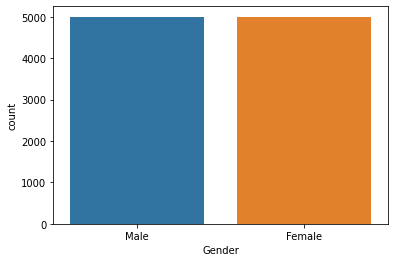

In [8]:
plot_1 = sns.countplot(x='Gender', data=result)

## Consider only Height

Create a pandas series of the `height` variable.

In [12]:
height_series = pd.Series(result['Height'])

### Histogram-plot

Plot the histogram of the `height`

In [15]:
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

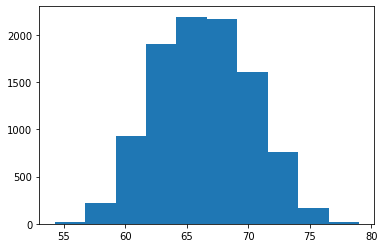

In [19]:
plot_height = plt.hist(height_series)

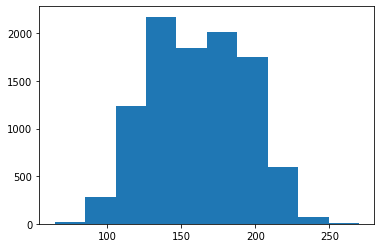

In [20]:
plot_weight = plt.hist(result['Weight'])

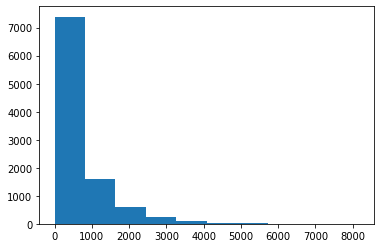

In [22]:
plot_weight = plt.hist(result['Money'])

### Box-plot

Plot the boxplot of the `height`

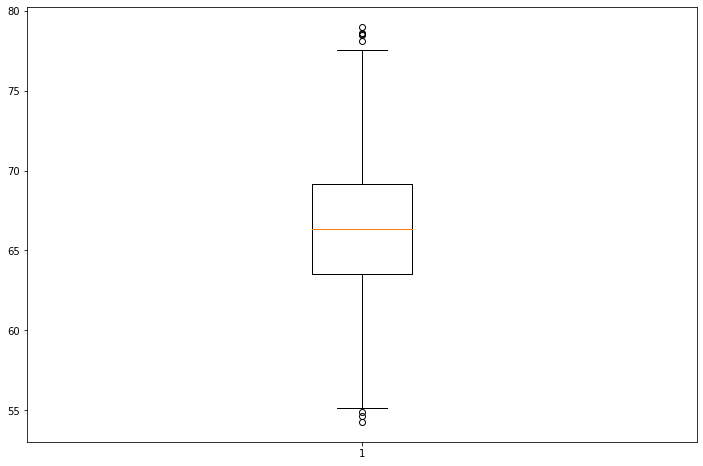

In [24]:
plt.figure(figsize=(12, 8))
plt.boxplot(height_series);

What do you think the distribution of `height` is like? Do you think it is common for variables to behave like that in real life?

In [ ]:
# Distribuição normal. Sim. >> https://www.ime.usp.br/~salles/fatec/estatistica/aula8.pdf

### KDE distribution for height

Plot the kde (kernel-density-estimation) distribution (without the hist distribution) of the `height`.

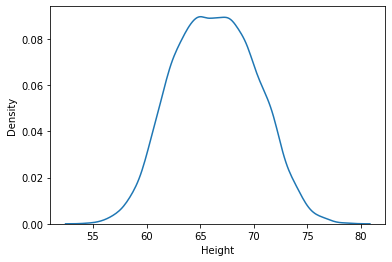

In [28]:
plot_3 = sns.kdeplot(data=result, x="Height")

### Analysis

As we can see we have a high count for height in the range near 60 to 75. How many people fall off 3 standard deviations from the mean? Can you consider them outliers? Why is that?

#### Calculate the mean

In [53]:
height_mean = result['Height'].mean()
print(height_mean)

66.36755975482124


#### Calculate the standard deviation 

In [54]:
height_std = result['Height'].std()
print(height_std)

3.8475281207732284


#### Calculate the values for the cutoffs:

`upper_cutoff = mean` <b><span style="color:red">+</span></b> `3 * standard_deviation` 

`lower_cutoff = mean` <b><span style="color:red">-</span></b> `3 * standard_deviation`

#### Now filter the original dataset. 

Use the values you calculated above to filter the original dataset. 

You should obtain a filtered dataset containing only the rows in which the `Height` column is greater than the upper cutoff and lower than the lower cutoff.

In [55]:
height_upper_cutoff = height_mean+3*height_std
print(height_upper_cutoff)
height_lower_cutoff = height_mean-3*height_std
print(height_lower_cutoff)

77.91014411714093
54.82497539250156


In [39]:
result['Height']>height_lower_cutoff

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Height, Length: 10000, dtype: bool

In [40]:
result['Height']<height_upper_cutoff

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Height, Length: 10000, dtype: bool

In [47]:
result[(result['Height']<height_upper_cutoff) & (result['Height']>height_lower_cutoff)]

,Gender,Height,Weight,Money
0,Male,73.847017,241.893563,21.462754
1,Male,68.781904,162.310473,94.732358
2,Male,74.110105,212.740856,130.077362
3,Male,71.730978,220.042470,214.096064
4,Male,69.881796,206.349801,765.091245
...,...,...,...,...
9995,Female,66.172652,136.777454,240.933121
9996,Female,67.067155,170.867906,1220.781276
9997,Female,63.867992,128.475319,0.258369
9998,Female,69.034243,163.852461,1552.920529


In [51]:
result_filtered = result.loc[result['Height']<=height_upper_cutoff].loc[result['Height']>=height_lower_cutoff]

In [52]:
result_filtered.sort_values(by = 'Height', ascending = False)

,Gender,Height,Weight,Money
4569,Male,77.547186,242.041173,1191.497177
2070,Male,77.465569,252.556689,332.683547
1922,Male,77.446620,232.651079,1309.431356
912,Male,77.160801,228.707301,549.413723
4297,Male,77.100872,240.455352,12.228225
...,...,...,...,...
5360,Female,55.668202,68.982530,1983.217259
8692,Female,55.651892,85.621776,3.906509
5345,Female,55.336492,88.366583,991.072650
7617,Female,55.148557,88.812412,572.823600


In [45]:
# result_filtered[result_filtered['Height']==78.4621]
# meu resultado não está dando igual ao da tabela

,Gender,Height,Weight,Money


Expected results:

|      | Gender   |   Height |   Weight |        Money |
|-----:|:---------|---------:|---------:|-------------:|
|  994 | Male     |  78.0959 | 255.691  | 1357.11      |
| 1317 | Male     |  78.4621 | 227.343  |    5.45797   |
| 2014 | Male     |  78.9987 | 269.99   |  131.474     |
| 3285 | Male     |  78.5282 | 253.889  |    0.0896631 |
| 3757 | Male     |  78.6214 | 245.734  |  204.113     |
| 6624 | Female   |  54.6169 |  71.3937 |  226.061     |
| 9285 | Female   |  54.2631 |  64.7001 |  646.532     |

#### Finally, calculate the shape of this filtered dataset and compare with the original dataframe.

Which percentage felt in these thresholds? Did you expect this value? Why?

In [46]:
result_filtered.describe()

,Height,Weight,Money
count,9993.000000,9993.000000,9.993000e+03
mean,66.363856,161.414473,6.313413e+02
std,3.835511,32.028986,8.062116e+02
min,54.873728,68.982530,1.735664e-07
25%,63.505894,135.819094,8.908791e+01
50%,66.317755,161.193433,3.392380e+02
75%,69.169353,187.120945,8.520559e+02
max,77.547186,255.863326,8.168216e+03


In [ ]:
result_filtered[]

## Now perform the same analysis for `money` variable.

You'll do exactly the same analysis for a variable of your dataset that has some different aspects. Let's try to understand that.

## Consider only Money

Create a pandas series of the `money` variable.

In [ ]:
# your code here

Shape

In [ ]:
# your code here

### Histogram-plot

In [ ]:
# your code here

### Box-plot

In [ ]:
# your code here

### KDE distribution for height

In [ ]:
# your code here

### Analysis

Again, how many people fall off 3 standard deviations in both cases (which percentage of the dataset)? Let's do it by parts:

#### Calculate the mean

In [ ]:
# your answer here

#### Calculate the standard deviation 

In [ ]:
# your answer here.

#### Calculate the values for the cutoffs:

`upper_cutoff = mean` <b><span style="color:red">+</span></b> `3 * standard_deviation` 

`lower_cutoff = mean` <b><span style="color:red">-</span></b> `3 * standard_deviation`

#### Again, filter the original dataset. 

In [ ]:
# your answer here

#### Finally, calculate the shape of this filtered dataset and compare with the original dataframe.

Which percentage felt in these thresholds? Did you expect this value?

In [ ]:
# your answer here

Expected result:

|     | Gender   |   Height |   Weight |   Money |
|----:|:---------|---------:|---------:|--------:|
| 234 | Male     |  67.3698 |  176.636 | 3725.08 |
| 294 | Male     |  64.4252 |  169.109 | 3942.97 |
| 355 | Male     |  72.9386 |  216.097 | 3762.42 |
| 518 | Male     |  68.3465 |  178.676 | 3286.66 |
| 662 | Male     |  69.431  |  172.326 | 3798.71 |
|   ...   | ...   |   ... |   ... |   ... |
| 9873 | Female   |  63.7072 |  132.761 | 3164.37 |
| 9888 | Female   |  65.1059 |  149.695 | 3929.57 |
| 9922 | Female   |  58.7525 |  106.846 | 3541.68 |
| 9930 | Female   |  68.5444 |  148.828 | 3916.32 |
| 9946 | Female   |  66.6245 |  149.828 | 6535.36 |

Can you consider them outliers?

In [ ]:
# your answer here

By now, you should have observed that in order to consider an observation an `outlier`, one needs to take into account the **distribution** of the variable. In fact, most statistical aspects do not mean anything until you understand the variable's distribution.

# Bivariate Analysis

## Considering both height and weight

Now we'll consider both height and weight variables to understand our data. We'll perform what is called a bivariate analysis.

### Perform a scatterplot to check the relation between Height and Weight

In [ ]:
plt.figure(figsize=(12, 8))
# your answer here

### Do the same plot, but color the markers by Gender

In [ ]:
plt.figure(figsize=(12, 8))
# your answer here

### Which insights hue'ing the plot using the variable Gender has brought to you? 

In [ ]:
# your answer here

### Create a variable called `gender_groupby` to group data by `Gender`. However, don't define any aggregations yet. 

Just perform the groupby operation.

In [ ]:
# your code here

#### Run `gender_groupby.head()` to check the groups obtained.

In [ ]:
# your answer here

#### Run gender_groupby.describe().T to check the statistics for each group. 

_hint: You can transpose this result to obtain a better visualization of the results_


In [ ]:
# your answer here

The results above should give you some insights of the effect of gender on your dataset both visually and numerically.

## Distribution plots

### Verifying the distribution of your variables for each Gender.

We have seen that each variable in our dataset has its own "DNA". This is the distribution of each variable. However, the story does not stop there. Each variable has peculiarities within it and it is our job as data analyst to discover it. We'll see futurely that what `machine learning models` mostly do for us is automate this process (if we understand them, of course) 

In this case, specifically, we want to understand the effect of our `Gender` variable on the distribution of our dataset.


### First, plot the distribution of the `Height` variable again.

In [ ]:
# your answer here

### Now, filter your dataset for each gender. Create a dataframe called `men` and another called `women` and plot the `Height` distribution for each of them in the same plot.

In [ ]:
# your answer here

### What insights could you observe from that? What is the impact of `Gender` on `Height`

In [ ]:
# your answer here

**Extra Note:** The issue: https://github.com/mwaskom/seaborn/issues/861 has a discussion of why distplot doesn't have a `hue` argument and how to overcome it (look for FacetGrid)

Try to do the same for the `Money` variable. What is the impact of `Gender` on `Money` ?

_Hint: for the Money variable, try specifying `hist=False`_


In [ ]:
# your answer here

## Boxplot 

### Gender vs Height

Plot the boxplot considering the x-axis as `Gender` and y-axis as `Height`

In [ ]:
plt.figure(figsize=(12, 8))
# your answer here

### Gender vs Money

In [ ]:
plt.figure(figsize=(12, 8))
# your answer here

From the conclusions of the previous exercises, did you expect the bloxplots to be like the ones above?

In [ ]:
# your answer here

### Multivariate Analysis

Use `sns.pairplot` to see some combinations obtained so far. Use `hue = 'Gender`. 

Note that in a real problem, pairplot starts to get messy since there can be countless number of variables in a dataset. Use it wisely.

Usually people only plot this graph and don't take any conclusions from it. Don't fall into that trap. 

In [ ]:
# your answer here